In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def h(x):
    return x/((1+x)**4)

First Job is to Plot the function to see if we can even expect a finite answer

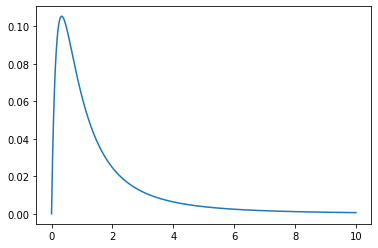

In [28]:
x=np.arange(0,10,0.0001)
y=h(x)

plt.plot(x,y)
plt.show()

Since the function aproaches 0 as it tends to infinity , we have a possibility of a finite answer

Now Lets Apply the required Transformation

In [29]:
def k(y):
    return h(y/(1-y))


def f(y):
    return 1/(1-y)**2 * k(y)

Now lets plot the Transformed function between Limits 0 to 1

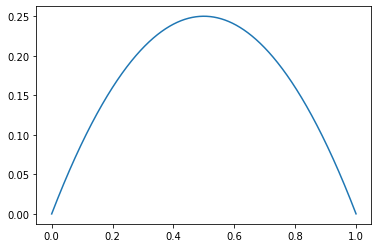

In [30]:
x=np.arange(0,1,0.0001)
y=f(x)

plt.plot(x,y)
plt.show()

Now Lets Calculate the integrals using various Methods


First Using the avg of the function . Error scales as O(1/sqrt(n))

In [31]:
def Integralbyavg(a,b,n):
    sum=0
    for i in range(0,n):
       xi=np.random.uniform(a,b)
       sum+=f(xi)
        

   
    return (b-a)*sum/n

In [32]:
Integralbyavg(0,1,10000)

0.16675580798914713

Next using the Multiple application of trapezoidal rule . Error Scales as O(1/n^2)

Next Using the Gauss Lengendre Polynomials

In [33]:
def p(x,a,b): 
   return f(((b+a)+(b-a)*x)/2)

import scipy.special as sc




def gaussLegendreofgivenDegree(deg,a,b):
    xi,wi=sc.roots_legendre(deg)
    ans=0
    for i in range(0,deg):
        ans+=wi[i]*p(xi[i],a,b)

    return(ans*(abs(a-b)/2))





In [34]:
gaussLegendreofgivenDegree(3,0,1)

0.16666666666666663

In [35]:
def q(x):
    return np.exp(x)*h(x)

So Using 2 different methods we get that the answer is 0.166666....


The final Confirmation can be obtained by using Gauss Laugree Polynomial Method on the Orignal Polynomial

In [36]:
def gaussLaugreeOfaGivenDegree(deg):
    xi,wi=sc.roots_laguerre(deg)
    ans=0
    for i in range(0,deg):
        ans+=wi[i]*q(xi[i])

    return ans
    

In [37]:
gaussLaugreeOfaGivenDegree(150)

0.166665214620672